<a href="https://colab.research.google.com/github/SharonEstivalez/FisicaComputacional1/blob/master/Actividad%207/Actividad7_Sharon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***$$ACTIVIDAD  \space 7$$***



Pacheco Rodriguez Sharon Estivalez

 01/ 03/ 21

In [39]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# **Ejercicio 1.** Defina las siguientes matrices.

\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation*}

\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}

 y la matrix identidad 

 \begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}

Calcule el resultado de $2*I+3*A+A@B$.

Para definir la matriz identidad, se puede utilizar la función *np.eye(2, dtype=int)*. Ver manual de  [np.eye()](https://numpy.org/doc/stable/reference/generated/numpy.eye.html).


In [ ]:
#Matriz A
A = np.array([[1,3],[-1,7]])
print(A)

#Matriz B
B = np.array([[5,2],[1,2]])
print(B)

#Matriz Identidad
I = np.eye(2, dtype=int)
print(I)

[[ 1  3]
 [-1  7]]
[[5 2]
 [1 2]]
[[1 0]
 [0 1]]


In [ ]:
Resultado = 2*I + 3*A + A@B
print(Resultado)

[[13 17]
 [-1 35]]


# **Ejercicio 2**. Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación 
\begin{equation}
\det(M - \lambda I) = 0
\end{equation}
Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como
\begin{equation}
P_2 (\lambda) = \det{(M)} - \mathrm{tr \,}(M) \, \lambda + \lambda^2   
\end{equation}
y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

\begin{equation}
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
\end{equation}

[El Teorema de Cayley-Hamilton](https://en.wikipedia.org/wiki/Cayley–Hamilton_theorem) nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico
\begin{equation}
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
\end{equation}
y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$. 

Demuestre esto para cualquier matriz M (2x2),  ($\det(M) \neq 0$).


Trabajaremos con la matriz
\begin{equation*}
 M
 =
  \begin{bmatrix}
   1 & 2 \\
   3 & 4
   \end{bmatrix}
\end{equation*}

In [ ]:
#Matriz M
M = np.array([[1,2],[3,4]])
print(M)

#determinante de M
det_M = la.det(M)
print(det_M)

#Traza de M
tr_M = np.trace(M)
print(tr_M)

#Demostración de polinomio característico mencionado anteriormente
P2M = det_M*I - tr_M*M + mpow(M,2)
print(P2M)

[[1 2]
 [3 4]]
-2.0
5
[[0. 0.]
 [0. 0.]]


# **Ejercicio 3:**

Resuelva el sistema de ecuaciones.

\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}

de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

In [ ]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones 

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A




In [ ]:
M = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print(M)
print('det(M) = ', la.det(M))

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]
det(M) =  -1.0000000000000004


In [ ]:
# Matriz aumentada: Unimos la matriz M con la matriz Identidad 
A = np.hstack([M,np.eye(3)])
print(A)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# "Sumar k veces el renglón j al renglón i en la matriz A."
# add_row(A,k,i,j):
# 1) L2 + -3L1 -> L2
A1 = add_row(A,-3,1,0)
print(A1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 2) 1/5 L2 -> L2
A2 = scale_row(A1,1/5,1)
print(A2)

[[ 1.  -3.   1.   1.   0.   0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   2.  -1.   0.   0.   1. ]]


In [ ]:
# 3) L3 + -2L2 -> L3
# "Sumar k veces el renglón j al renglón i en la matriz A."
# add_row(A,k,i,j):
A3 = add_row(A2,-2,2,1)
print(A3)

[[ 1.  -3.   1.   1.   0.   0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]


In [ ]:
# 4) L1 + 3L2 -> L1
A4 = add_row(A3,3,0,1)
print(A4)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]


In [ ]:
# 5) 1/L3[3] -> L3
A5 = scale_row(A4,1/(A4[2,2]),2)
print(A5)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   0.   1.  -6.   2.  -5. ]]


In [ ]:
# 6) L2 + -(L2[3])/(L3[3]) -> L2
A6 = add_row(A5,-1*(A5[1,2]/(A5[2,2])),1,2)
print(A6)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   1.   0.  -3.   1.  -2. ]
 [ 0.   0.   1.  -6.   2.  -5. ]]


In [ ]:
# 7) L1 + -(L1[3])/(L3[3]) -> L1
A7 = add_row(A6,-1*(A6[0,2]/(A6[2,2])),0,2)
print(A7)

[[ 1.  0.  0. -2.  1. -1.]
 [ 0.  1.  0. -3.  1. -2.]
 [ 0.  0.  1. -6.  2. -5.]]


In [ ]:
#Ya tenemos la inversa
M_inv = A7[:,3:]
print(M_inv)

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [ ]:
#Comprobar que es la inversa
la.inv(M)

array([[-2.,  1., -1.],
       [-3.,  1., -2.],
       [-6.,  2., -5.]])

In [ ]:
# definimos b. Recordemos que tenemos que usar la función .reshape()
b = np.array([1,5,0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [ ]:
# La solución es:
x = M_inv @ b 
print(x) 


[[3.]
 [2.]
 [4.]]


**Función scipy.linalg.solve()**

In [ ]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x_sol = la.solve(M, b)
print(x_sol)

[[3.]
 [2.]
 [4.]]


# **Ejercicio 4:** 

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre [Eigenvalores y Eigenvectores](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Matrix_examples)) 


\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}

Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de *scipy.linalg.eig()*, y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia. 

In [ ]:
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

In [ ]:
# Aplicamos la biblioteca scipy.linalg.eig()

eigvalsB1, eigvecsB1 = la.eig(B1)
print("Para B1 son:")
print('Eigenvalores:', eigvalsB1)
print('Eigenvectores:', eigvecsB1)
print()

eigvalsB2, eigvecsB2 = la.eig(B2)
print("Para B2 son:")
print('Eigenvalores:', eigvalsB2)
print('Eigenvectores:', eigvecsB2)
print()

eigvalsB3, eigvecsB3 = la.eig(B3)
print("Para B3 son:")
print('Eigenvalores:', eigvalsB3)
print('Eigenvectores:', eigvecsB3)

Para B1 son:
Eigenvalores: [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores: [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]

Para B2 son:
Eigenvalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores: [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]

Para B3 son:
Eigenvalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]


Son correctos ya que son proporcionales a los de la página.

# **Ejercicio 5.**
Se tienen los siguientes 8 puntos: 

\begin{eqnarray*} 
(x&,&y) \\
(0.0 &,& 0.0), \\ 
(0.5 &,& 0.47942), \\ 
(1.0 &,& 0.84147), \\
(1.5 &,& 0.99749), \\
(2.0 &,& 0.90930), \\
(2.5 &,& 0.59847), \\
(3.0 &,& 0.14112), \\
(3.5 &,& -0.35078) \\
\end{eqnarray*}

Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos. 

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.



In [ ]:
x = ([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
#matriz de Vandermonde
X = np.vander(x, increasing=True)

#print(X)
y = np.array([0.0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

#print(y)

In [ ]:
# Usamos la función de scipy.linalg.solve(), para encontrar los coeficientes
# de la ecuación lineal Xa=y

a = la.solve(X,y)
print(a)

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


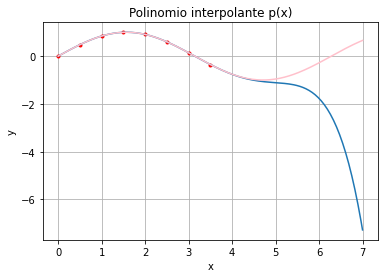

In [ ]:
# Graficamos el polinomio interpolante y los puntos interpolados
# Los puntos interpolados en rojo ('r.')
xs = np.linspace(0,7,200)
ys = sum([a[k]*xs**k for k in range(0,8)])
Seno = np.sin(xs)
plt.plot(x,y,'r.',xs,ys)
plt.plot(xs,Seno,'pink')
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# **Ejercicio 6.** 
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

**NOTA:** Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones. 


In [40]:
#Tomar url en raw
url = 'https://raw.githubusercontent.com/SharonEstivalez/FisicaComputacional1/master/Actividad%203/10090.txt'

#Nombres para las columnas
col =  ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin'] 

# encoding='cp1251' Windows (Europa Occidental)
# sep='\s+' el separador de datos es de uno o más espacios
#header=None no hay encabezado
#skiprows=19 Se brincará los primeros 19 renglones 
#skipfooter=1 Se brincará el último renglón
#engine='python' Se procesan los datos utilizando Python 
df_act = pd.read_csv(url, names=col, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Hacer una copia del DataFrame
df_sp0 = df_act.copy()

#Reemplazar "Nulo" por espacio en blanco
str_Nulo = 'Nulo'
df_sp1 = df_sp0.replace(to_replace=str_Nulo, value='', regex=True)

#Convertir las valores de Precip, Evap, Tmax y Tmin en flotantes
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_sp1[cols] = pd.to_numeric(df_sp1[cols], errors='coerce')

#Hacer copia del DataFrame anterior para trabajar con ella

df_sp2 = df_sp1.copy()

#Tomar "Fecha" y convertirlo al formato fecha que entiende python
df_sp2['Fecha'] = pd.to_datetime(df_sp2['Fecha'], dayfirst=True).copy()


#Añadir dos columnas, año y fecha

df_sp2['Año'] = df_sp2['Fecha'].dt.year
df_sp2['Mes'] = df_sp2['Fecha'].dt.strftime('%b')


#Nueva copia para este trabajo
df_dm = df_sp2.copy()

#df_dm.info()
#print(df_dm.head())
#print(df_dm.tail())


#Copia del DataFrame 
df_dm_ts = df_dm.copy()

#El índice será la variable 'Fecha'
df_dm_ts = df_dm_ts.set_index('Fecha')

#Para verificar
df_dm_ts.info()
#print(df_dm_ts.head())
#print(df_dm_ts.tail())

#Hacer períodos de 30 años aprox
#1963-2018
df_63 = df_dm_ts[(df_dm_ts['Año'] >= 1963) & (df_dm_ts['Año'] < 1990)]
df_90 = df_dm_ts[(df_dm_ts['Año'] >= 1990) & (df_dm_ts['Año'] < 2018)]


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19592 entries, 1963-08-01 to 2018-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  19558 non-null  float64
 1   Evap    17688 non-null  float64
 2   Tmax    19484 non-null  float64
 3   Tmin    19487 non-null  float64
 4   Año     19592 non-null  int64  
 5   Mes     19592 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.0+ MB


In [41]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [42]:
df_dm.head()

,Fecha,Precip,Evap,Tmax,Tmin,Año,Mes
0,1963-08-01,0.0,3.6,28.0,10.0,1963,Aug
1,1963-08-02,0.0,4.8,21.0,11.0,1963,Aug
2,1963-08-03,0.0,4.5,25.0,10.0,1963,Aug
3,1963-08-04,0.0,4.0,18.0,11.0,1963,Aug
4,1963-08-05,9.0,2.5,24.5,12.0,1963,Aug


In [43]:
df_n = df_dm.copy()
del(df_n['Precip'],df_n['Evap'],df_n['Año'],df_n['Mes'])
df_n.head()

,Fecha,Tmax,Tmin
0,1963-08-01,28.0,10.0
1,1963-08-02,21.0,11.0
2,1963-08-03,25.0,10.0
3,1963-08-04,18.0,11.0
4,1963-08-05,24.5,12.0


In [44]:
N = len(df_n)
df_n['FechaDecimal']=df_n['Tmax']

for f in range(N): 
  
  df_n['FechaDecimal'].iloc[f]=toYearFraction(df_n['Fecha'].iloc[f])

del(df_n['Fecha']) 

print(df_n)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


       Tmax  Tmin  FechaDecimal
0      28.0  10.0   1963.580822
1      21.0  11.0   1963.583562
2      25.0  10.0   1963.586301
3      18.0  11.0   1963.589041
4      24.5  12.0   1963.591781
...     ...   ...           ...
19587  22.0   2.0   2018.986301
19588  22.0  -3.0   2018.989041
19589  20.0   1.0   2018.991781
19590  20.0  -1.0   2018.994521
19591  22.0  -3.0   2018.997260

[19592 rows x 3 columns]


In [45]:
x=df_n['FechaDecimal']
X=np.column_stack([np.ones(N),x])
print('Shape:', X.shape)

Shape: (19592, 2)


In [48]:
df_n.isnull().sum()
df_n.fillna(df_n.mean(), inplace=True)
ymax=np.array(df_n['Tmax'])
ymin=np.array(df_n['Tmin'])

In [49]:
amax = la.solve(X.T @ X, X.T @ ymax)
amin = la.solve(X.T @ X, X.T @ ymin)
print('Para Tmax')
print(amax)
print('Para Tmin')
print(amin)

Para Tmax
[ 5.04159870e+01 -1.27103481e-02]
Para Tmin
[-6.79599182e+01  3.76234466e-02]


Para la temperatura máxima
$$ 50.4159870 - 0.0127103481 t $$

Para la temperatura mínima
$$-67.9599182  0.0376234466 t$$
